## Load working and output directories


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow
sns.set_style("white")
from matplotlib.image import imread

In [2]:
working_dir = os.getcwd()
print(f"You are now working in {working_dir}")
print("If you need to change to the parent directory, run the cell below")

You are now working in c:\Users\fredd\Desktop\Studier\Project5\mushrooms\Mushroom_edible_gallery\jupyter_notebooks
If you need to change to the parent directory, run the cell below


In [3]:
os.chdir(os.path.dirname(working_dir))

In [4]:
working_dir = os.getcwd()
print(f"You have now changed your working directory to {working_dir}")

You have now changed your working directory to c:\Users\fredd\Desktop\Studier\Project5\mushrooms\Mushroom_edible_gallery


In [5]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print("This version already exists, create a new version if you are working on a new version")
    pass
else:
    os.makedirs(name=file_path)

This version already exists, create a new version if you are working on a new version


In [6]:
image_dirs = 'input/dataset/raw/MO_94'
train_path = image_dirs + '/train'
val_path = image_dirs + '/validation'
test_path = image_dirs + '/test'

In [7]:
labels = os.listdir(train_path)
print("Label for the images are:")
for specie in labels:
    print(specie)

Label for the images are:
Agaricus augustus
Agaricus xanthodermus
Amanita amerirubescens
Amanita augusta
Amanita brunnescens
Amanita calyptroderma
Amanita flavoconia
Amanita muscaria
Amanita persicina
Amanita phalloides
Amanita velosa
Armillaria mellea
Armillaria tabescens
Artomyces pyxidatus
Bolbitius titubans
Boletus pallidus
Boletus rex-veris
Cantharellus californicus
Cantharellus cinnabarinus
Cerioporus squamosus
Chlorophyllum brunneum
Chlorophyllum molybdites
Clitocybe nuda
Coprinellus micaceus
Coprinopsis lagopus
Coprinus comatus
Crucibulum laeve
Cryptoporus volvatus
Daedaleopsis confragosa
Entoloma abortivum
Flammulina velutipes
Fomitopsis mounceae
Galerina marginata
Ganoderma applanatum
Ganoderma curtisii
Ganoderma oregonense
Ganoderma tsugae
Gliophorus psittacinus
Gloeophyllum sepiarium
Grifola frondosa
Gymnopilus luteofolius
Hericium coralloides
Hericium erinaceus
Hygrophoropsis aurantiaca
Hypholoma fasciculare
Hypholoma lateritium
Hypomyces lactifluorum
Ischnoderma resinosum

In [8]:
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(497, 606, 3)

<hr>

## Total amount of images in each set directory


This function below will calculate the total amount of images in each set and also show a mean value line through all sets.

 train - Agaricus augustus: 238 images
 train - Agaricus xanthodermus: 212 images
 train - Amanita amerirubescens: 235 images
 train - Amanita augusta: 231 images
 train - Amanita brunnescens: 214 images
 train - Amanita calyptroderma: 229 images
 train - Amanita flavoconia: 224 images
 train - Amanita muscaria: 229 images
 train - Amanita persicina: 184 images
 train - Amanita phalloides: 224 images
 train - Amanita velosa: 198 images
 train - Armillaria mellea: 229 images
 train - Armillaria tabescens: 247 images
 train - Artomyces pyxidatus: 246 images
 train - Bolbitius titubans: 224 images
 train - Boletus pallidus: 224 images
 train - Boletus rex-veris: 215 images
 train - Cantharellus californicus: 227 images
 train - Cantharellus cinnabarinus: 233 images
 train - Cerioporus squamosus: 204 images
 train - Chlorophyllum brunneum: 193 images
 train - Chlorophyllum molybdites: 165 images
 train - Clitocybe nuda: 204 images
 train - Coprinellus micaceus: 219 images
 train - Coprinop

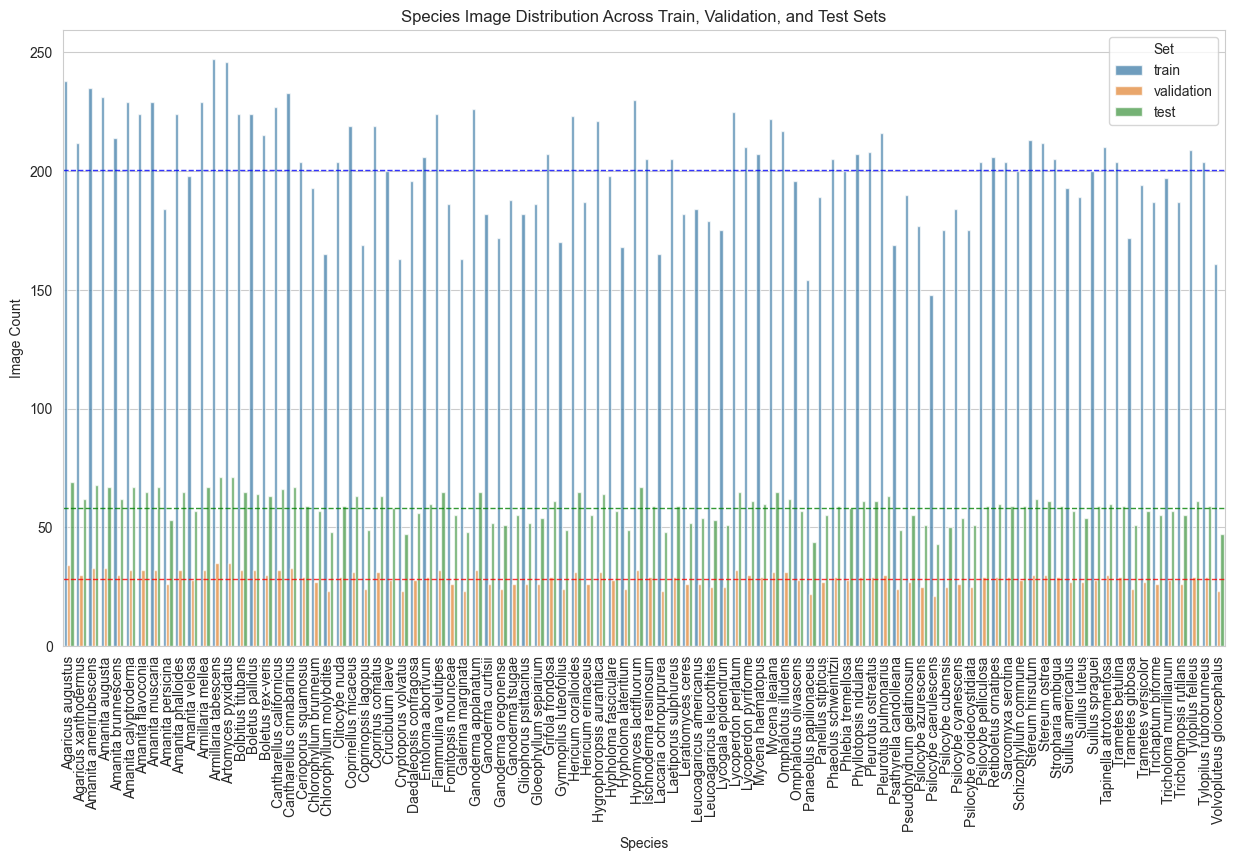

In [9]:
df_freq = pd.DataFrame()
# Iterates thorugh all folders and species, then adding them as rows in df_freq
for folder in ['train', 'validation', 'test']:
    for specie in labels:
        specie_path = os.path.join(image_dirs, folder, specie)
        num_images = len(os.listdir(specie_path))
        new_row = pd.DataFrame({
            'Set': [folder],
            'Label': [specie],
            'Frequency': [num_images]
        })  
        df_freq = pd.concat([df_freq, new_row], ignore_index=True)
        
        print(f" {folder} - {specie}: {num_images} images")
        
print("\n")

# Creates a barplot to show the values
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
barplot = sns.barplot(data=df_freq, x='Label', y='Frequency', hue='Set', alpha=0.7, dodge=True)
plt.xticks(rotation=90) # Rotates x-labels to be more reabable

# Calculates the mean value of each set
mean_frequencies = df_freq.groupby('Set')['Frequency'].mean()
colors = {'train': 'blue', 'validation': 'red', 'test': 'green'}

# Draws a horisontal line for each mean value
for set_name, mean_freq in mean_frequencies.items():
    plt.axhline(y=mean_freq, color=colors[set_name], linestyle='--', linewidth=1, alpha=0.8, label=f'{set_name} Mean')

plt.title("Species Image Distribution Across Train, Validation, and Test Sets")
plt.xlabel("Species")
plt.ylabel("Image Count")

plt.savefig(f"{file_path}/species_amount_distribution_through_all_sets.png", dpi=150)
plt.show()

# Image Augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Function to run augmentation on images

In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=30,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255,
                                          brightness_range=[0.8, 1.2]
                                          )

### Augment training image dataset

In [13]:
batch_size = 32
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True,
                                                     seed=42
                                                     )

train_set.class_indices


Found 18834 images belonging to 94 classes.


{'Agaricus augustus': 0,
 'Agaricus xanthodermus': 1,
 'Amanita amerirubescens': 2,
 'Amanita augusta': 3,
 'Amanita brunnescens': 4,
 'Amanita calyptroderma': 5,
 'Amanita flavoconia': 6,
 'Amanita muscaria': 7,
 'Amanita persicina': 8,
 'Amanita phalloides': 9,
 'Amanita velosa': 10,
 'Armillaria mellea': 11,
 'Armillaria tabescens': 12,
 'Artomyces pyxidatus': 13,
 'Bolbitius titubans': 14,
 'Boletus pallidus': 15,
 'Boletus rex-veris': 16,
 'Cantharellus californicus': 17,
 'Cantharellus cinnabarinus': 18,
 'Cerioporus squamosus': 19,
 'Chlorophyllum brunneum': 20,
 'Chlorophyllum molybdites': 21,
 'Clitocybe nuda': 22,
 'Coprinellus micaceus': 23,
 'Coprinopsis lagopus': 24,
 'Coprinus comatus': 25,
 'Crucibulum laeve': 26,
 'Cryptoporus volvatus': 27,
 'Daedaleopsis confragosa': 28,
 'Entoloma abortivum': 29,
 'Flammulina velutipes': 30,
 'Fomitopsis mounceae': 31,
 'Galerina marginata': 32,
 'Ganoderma applanatum': 33,
 'Ganoderma curtisii': 34,
 'Ganoderma oregonense': 35,
 'Ga

### Augment validation image dataset

In [14]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False)

validation_set.class_indices

Found 2659 images belonging to 94 classes.


{'Agaricus augustus': 0,
 'Agaricus xanthodermus': 1,
 'Amanita amerirubescens': 2,
 'Amanita augusta': 3,
 'Amanita brunnescens': 4,
 'Amanita calyptroderma': 5,
 'Amanita flavoconia': 6,
 'Amanita muscaria': 7,
 'Amanita persicina': 8,
 'Amanita phalloides': 9,
 'Amanita velosa': 10,
 'Armillaria mellea': 11,
 'Armillaria tabescens': 12,
 'Artomyces pyxidatus': 13,
 'Bolbitius titubans': 14,
 'Boletus pallidus': 15,
 'Boletus rex-veris': 16,
 'Cantharellus californicus': 17,
 'Cantharellus cinnabarinus': 18,
 'Cerioporus squamosus': 19,
 'Chlorophyllum brunneum': 20,
 'Chlorophyllum molybdites': 21,
 'Clitocybe nuda': 22,
 'Coprinellus micaceus': 23,
 'Coprinopsis lagopus': 24,
 'Coprinus comatus': 25,
 'Crucibulum laeve': 26,
 'Cryptoporus volvatus': 27,
 'Daedaleopsis confragosa': 28,
 'Entoloma abortivum': 29,
 'Flammulina velutipes': 30,
 'Fomitopsis mounceae': 31,
 'Galerina marginata': 32,
 'Ganoderma applanatum': 33,
 'Ganoderma curtisii': 34,
 'Ganoderma oregonense': 35,
 'Ga

### Augment test images dataset

In [15]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='categorical',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 5469 images belonging to 94 classes.


{'Agaricus augustus': 0,
 'Agaricus xanthodermus': 1,
 'Amanita amerirubescens': 2,
 'Amanita augusta': 3,
 'Amanita brunnescens': 4,
 'Amanita calyptroderma': 5,
 'Amanita flavoconia': 6,
 'Amanita muscaria': 7,
 'Amanita persicina': 8,
 'Amanita phalloides': 9,
 'Amanita velosa': 10,
 'Armillaria mellea': 11,
 'Armillaria tabescens': 12,
 'Artomyces pyxidatus': 13,
 'Bolbitius titubans': 14,
 'Boletus pallidus': 15,
 'Boletus rex-veris': 16,
 'Cantharellus californicus': 17,
 'Cantharellus cinnabarinus': 18,
 'Cerioporus squamosus': 19,
 'Chlorophyllum brunneum': 20,
 'Chlorophyllum molybdites': 21,
 'Clitocybe nuda': 22,
 'Coprinellus micaceus': 23,
 'Coprinopsis lagopus': 24,
 'Coprinus comatus': 25,
 'Crucibulum laeve': 26,
 'Cryptoporus volvatus': 27,
 'Daedaleopsis confragosa': 28,
 'Entoloma abortivum': 29,
 'Flammulina velutipes': 30,
 'Fomitopsis mounceae': 31,
 'Galerina marginata': 32,
 'Ganoderma applanatum': 33,
 'Ganoderma curtisii': 34,
 'Ganoderma oregonense': 35,
 'Ga

Save class_indices for further use

In [16]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

<hr>

# Model creation


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

num_classes = len(train_set.class_indices)

model = Sequential()

model.add(Input(shape=(image_shape[0], image_shape[1], 3)))

# First convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_shape[0], image_shape[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convulation layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convulation layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='softmax'))  

# Kompilera modellen
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    


C:\Users\fredd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model.fit(train_set, validation_data=validation_set, epochs=20, callbacks=[early_stopping])

Epoch 1/20
 68/589 ━━━━━━━━━━━━━━━━━━━━ 1:00:02 7s/step - accuracy: 0.0230 - loss: 4.5112

KeyboardInterrupt: 